## Demo Transformation Logging Process

In [1]:
import textattack
import transformers

/home/coraline/anaconda3/envs/dpml/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-06-10 02:40:50.307276: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
model = transformers.AutoModelForSequenceClassification.from_pretrained("textattack/bert-base-uncased-SST-2")
tokenizer = transformers.AutoTokenizer.from_pretrained("textattack/bert-base-uncased-SST-2", use_fast=True)
model_wrapper = textattack.models.wrappers.HuggingFaceModelWrapper(model, tokenizer)

attack = textattack.attack_recipes.A2TYoo2021.build(model_wrapper)
dataset = textattack.datasets.HuggingFaceDataset("glue", "sst2", split="validation")


textattack: Unknown if model of class <class 'transformers.models.bert.modeling_bert.BertForSequenceClassification'> compatible with goal function <class 'textattack.goal_functions.classification.untargeted_classification.UntargetedClassification'>.
Reusing dataset glue (/home/coraline/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)
100%|███████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 1349.08it/s]
textattack: Loading datasets dataset glue, subset sst2, split validation.


In [3]:
# Attack 20 samples with CSV logging and checkpoint saved every 5 interval
attack_args = textattack.AttackArgs(
    num_examples=20,
    csv_coloring_style="plain",
    log_to_csv="../results/log.csv",
    checkpoint_interval=20,
    disable_stdout=True
)

attacker = textattack.Attacker(attack, dataset, attack_args)
results = attacker.attack_dataset()

textattack: Logging to CSV at path ../results/log.csv


Attack(
  (search_method): GreedyWordSwapWIR(
    (wir_method):  gradient
  )
  (goal_function):  UntargetedClassification
  (transformation):  WordSwapEmbedding(
    (max_candidates):  20
    (embedding):  WordEmbedding
  )
  (constraints): 
    (0): PartOfSpeech(
        (tagger_type):  nltk
        (tagset):  universal
        (allow_verb_noun_swap):  False
        (compare_against_original):  True
      )
    (1): BERT(
        (metric):  cosine
        (threshold):  0.9
        (window_size):  inf
        (skip_text_shorter_than_window):  False
        (compare_against_original):  True
      )
    (2): WordEmbeddingDistance(
        (embedding):  WordEmbedding
        (min_cos_sim):  0.8
        (cased):  False
        (include_unknown_words):  True
        (compare_against_original):  True
      )
    (3): RepeatModification
    (4): StopwordModification
    (5): InputColumnModification(
        (matching_column_labels):  ['premise', 'hypothesis']
        (columns_to_ignore):  {'

  0%|                                                                                                | 0/20 [00:00<?, ?it/s]/home/coraline/anaconda3/envs/dpml/lib/python3.7/site-packages/torch/nn/modules/module.py:1033: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
[Succeeded / Failed / Skipped / Total] 2 / 17 / 1 / 20: 100%|███████████████████████████████| 20/20 [00:18<00:00,  1.08it/s]textattack: Saving checkpoint under "checkpoints/1654854098598.ta.chkpt" at 2022-06-10 02:41:38 after 20 attacks.
[Succeeded / Failed / Skipped / Total] 2 / 17 / 1 / 20: 100%|███████████████████████████████| 20/20 [00:18<00:00,  1.08it/s]





+-------------------------------+--------+
| Attack Results                |        |
+-------------------------------+--------+
| Number of successful attacks: | 2      |
| Number of failed attacks:     | 17     |
| Number of skipped attacks:    | 1      |
| Original accuracy:            | 95.0%  |
| Accuracy under attack:        | 85.0%  |
| Attack success rate:          | 10.53% |
| Average perturbed word %:     | 18.75% |
| Average num. words per input: | 15.8   |
| Avg num queries:              | 14.26  |
+-------------------------------+--------+


## Logging Results

In [4]:
import pandas as pd

In [66]:
log_df = pd.read_csv('../results/log.csv')
out_df = log_df[['original_text', 'perturbed_text', 'result_type']]
out_df

,original_text,perturbed_text,result_type
0,it 's a charming and often affecting journey .,it 's a charming and normally affecting journe...,Failed
1,unflinchingly bleak and desperate,unflinchingly grim and desperate,Failed
2,allows us to hope that nolan is poised to emba...,authorizes us to hopes that nolan is prepped t...,Failed
3,"the acting , costumes , music , cinematography...","the acting , costumes , music , cinematography...",Successful
4,"it 's slow -- very , very slow .","it 's slow -- very , very slower .",Failed
5,although laced with humor and a few fanciful t...,although laced with mood and a few fanciful to...,Failed
6,a sometimes tedious film .,a occasionally tedious movies .,Failed
7,or doing last year 's taxes with your ex-wife .,or doing last year 's taxation with your ex-wi...,Failed
8,you do n't have to know about music to appreci...,you do n't have to know about music to thankfu...,Failed
9,"in exactly 89 minutes , most of which passed a...","in exactly 89 minutes , most of which passed a...",Failed


In [65]:
transformation_log = pd.read_csv('../results/transformation.csv', index_col=0, names = ["transformation_id","transformation_type",
            "prev_text", "after_text", "from_modified_indices",
            "to_modified_indices", "changes"])
transformation_log

,transformation_type,prev_text,after_text,from_modified_indices,to_modified_indices,changes
transformation_id,,,,,,
0,WordSwapEmbedding,0,1,{3},{3},"[('equal', 0, 6, 0, 6), ('replace', 6, 7, 6, 7..."
1,WordSwapEmbedding,2,3,{3},{3},"[('equal', 0, 6, 0, 6), ('replace', 6, 7, 6, 7..."
2,WordSwapEmbedding,2,4,{3},{3},"[('equal', 0, 6, 0, 6), ('replace', 6, 7, 6, 7..."
3,WordSwapEmbedding,2,5,{3},{3},"[('equal', 0, 6, 0, 6), ('replace', 6, 7, 6, 7..."
4,WordSwapEmbedding,2,6,{3},{3},"[('equal', 0, 6, 0, 6), ('replace', 6, 7, 6, 7..."
...,...,...,...,...,...,...
1335,WordSwapEmbedding,1314,1349,{9},{9},"[('equal', 0, 19, 0, 19), ('replace', 19, 20, ..."
1336,WordSwapEmbedding,1314,1350,{9},{9},"[('equal', 0, 19, 0, 19), ('replace', 19, 20, ..."
1337,WordSwapEmbedding,1314,1351,{9},{9},"[('equal', 0, 19, 0, 19), ('replace', 19, 20, ..."


In [60]:
edge_to_transformation = transformation_log.set_index(['prev_text', 'after_text'])
edge_to_transformation

transformation_type from_modified_indices  \
prev_text after_text                                             
0         1            WordSwapEmbedding                   {3}   
2         3            WordSwapEmbedding                   {3}   
          4            WordSwapEmbedding                   {3}   
          5            WordSwapEmbedding                   {3}   
          6            WordSwapEmbedding                   {3}   
...                                  ...                   ...   
1982      2095         WordSwapEmbedding                  {15}   
          2096         WordSwapEmbedding                  {15}   
          2097         WordSwapEmbedding                  {15}   
          2098         WordSwapEmbedding                  {15}   
          2099         WordSwapEmbedding                  {15}   

                     to_modified_indices  \
prev_text after_text                       
0         1                          {3}   
2         3                          {3}   
          4                          {3}   
          5                          {3}   
          6                          {3}   
...                                  ...   
1982      2095                      {15}   
          2096                      {15}   
          2097                      {15}   
          2098                      {15}   
          2099                      {15}   

                                                                changes  
prev_text after_text                                                     
0         1           [('equal', 0, 6, 0, 6), ('replace', 6, 7, 6, 7...  
2         3           [('equal', 0, 6, 0, 6), ('replace', 6, 7, 6, 7...  
          4           [('equal', 0, 6, 0, 6), ('replace', 6, 7, 6, 7...  
          5           [('equal', 0, 6, 0, 6), ('replace', 6, 7, 6, 7...  
          6           [('equal', 0, 6, 0, 6), ('replace', 6, 7, 6, 7...  
...                                                                 ...  
1982      2095        [('equal', 0, 30, 0, 30), ('replace', 30, 31, ...  
          2096        [('equal', 0, 30, 0, 30), ('replace', 30, 31, ...  
          2097        [('equal', 0, 30, 0, 30), ('replace', 30, 31, ...  
          2098        [('equal', 0, 30, 0, 30), ('replace', 30, 31, ...  
          2099        [('equal', 0, 30, 0, 30), ('replace', 30, 31, ...  

[2080 rows x 4 columns]

In [7]:
edges_df = transformation_log[['prev_text','after_text']]
forward_edges_df = edges_df.set_index('prev_text')
backward_edges_df = edges_df.set_index('after_text')

In [9]:
id_to_text = pd.read_csv('../results/text.csv', index_col="text_id", names = ["text_id", "text"])
text_to_id = pd.read_csv('../results/text.csv', index_col="text", names = ["text_id", "text"])

In [67]:
id_to_text

,text
text_id,
0,it 's a charming and often affecting journey .
1,it 's a enchanting and often affecting journey .
2,it 's a charming and often affecting journey .
3,it 's a charmer and often affecting journey .
4,it 's a loveable and often affecting journey .
...,...
2095,"in its finest moments , reminds a wicked high ..."
2096,"in its finest moments , reminds a wicked high ..."
2097,"in its finest moments , reminds a wicked high ..."


In [10]:
text_to_id

,text_id
text,
it 's a charming and often affecting journey .,0
it 's a enchanting and often affecting journey .,1
it 's a charming and often affecting journey .,2
it 's a charmer and often affecting journey .,3
it 's a loveable and often affecting journey .,4
...,...
"in its finest moments , reminds a wicked high school production of grease , without benefit of lyric .",2095
"in its finest moments , reminds a wicked high school production of grease , without benefit of ballads .",2096
"in its finest moments , reminds a wicked high school production of grease , without benefit of tune .",2097


In [11]:
for k in text_to_id.index.values:
    if "resembles a bad high school production of grease" in k:
        print(k)

in its best moments , resembles a bad high school production of grease , without benefit of song . 


## Single Query

In [12]:
query_output = out_df.loc[19]['perturbed_text']
query_output

'in its finest moments , reminds a wicked high school production of grease , without benefit of chanson . '

In [23]:
cur_text_id = text_to_id.loc[query_output]['text_id']
trace = []
while cur_text_id in backward_edges_df.index:
    trace.append((cur_text_id, id_to_text.loc[cur_text_id]['text']))
    cur_text_id = backward_edges_df.loc[cur_text_id]['prev_text']
trace.append((cur_text_id, id_to_text.loc[cur_text_id]['text']))

In [63]:
trace = trace[::-1]
for i in range(len(trace) - 1):
    row=edge_to_transformation.loc[trace[i][0], trace[i+1][0]]
    from_to = row[["from_modified_indices", "to_modified_indices"]].values
    print(trace[i])
    print(f"{from_to[0]} --> {from_to[1]}")

(1899, 'in its best moments , resembles a bad high school production of grease , without benefit of song . ')
{6} --> {6}
(1905, 'in its best moments , resembles a wicked high school production of grease , without benefit of song . ')
{4} --> {4}
(1940, 'in its best moments , reminds a wicked high school production of grease , without benefit of song . ')
{2} --> {2}
(1982, 'in its finest moments , reminds a wicked high school production of grease , without benefit of song . ')
{15} --> {15}


with lineage: 872 examples

-real	13m56.328s
-user	12m56.848s
-sys	0m9.684s

## Input to Output

In [20]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from pylab import rcParams

In [37]:
start = out_df.loc[19]['original_text']
start

'in its best moments , resembles a bad high school production of grease , without benefit of song . '

In [45]:
assert text_to_id.loc[start]['text_id'] == trace[0][0]

In [56]:
G = nx.DiGraph()


def bfs(root):
    visited = [root]
    queue = [root]

    while queue:
        s = queue.pop(0) 
        print (s, end = " ") 
        if s not in forward_edges_df.index:
            continue
        
        for neighbor in forward_edges_df.loc[s]['after_text']:
            if neighbor not in visited:
                #nx.add_path(G, [id_to_text.loc[s]['text'], id_to_text.loc[neighbor]['text']])
                nx.add_path(G, [s, neighbor])
                visited.append(neighbor)
                queue.append(neighbor)

# Driver Code
bfs(trace[0][0])

1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063 2064 2065 2066 2067 2068 2069 2070 2071 2072 2073 2074 2075 2076 2077 2078 2079 2080 2081 2082 2083 2084 2085 2086 2087 2088 2089 2090 2091 2092 2093 2094 2095 2096 2097 2098 

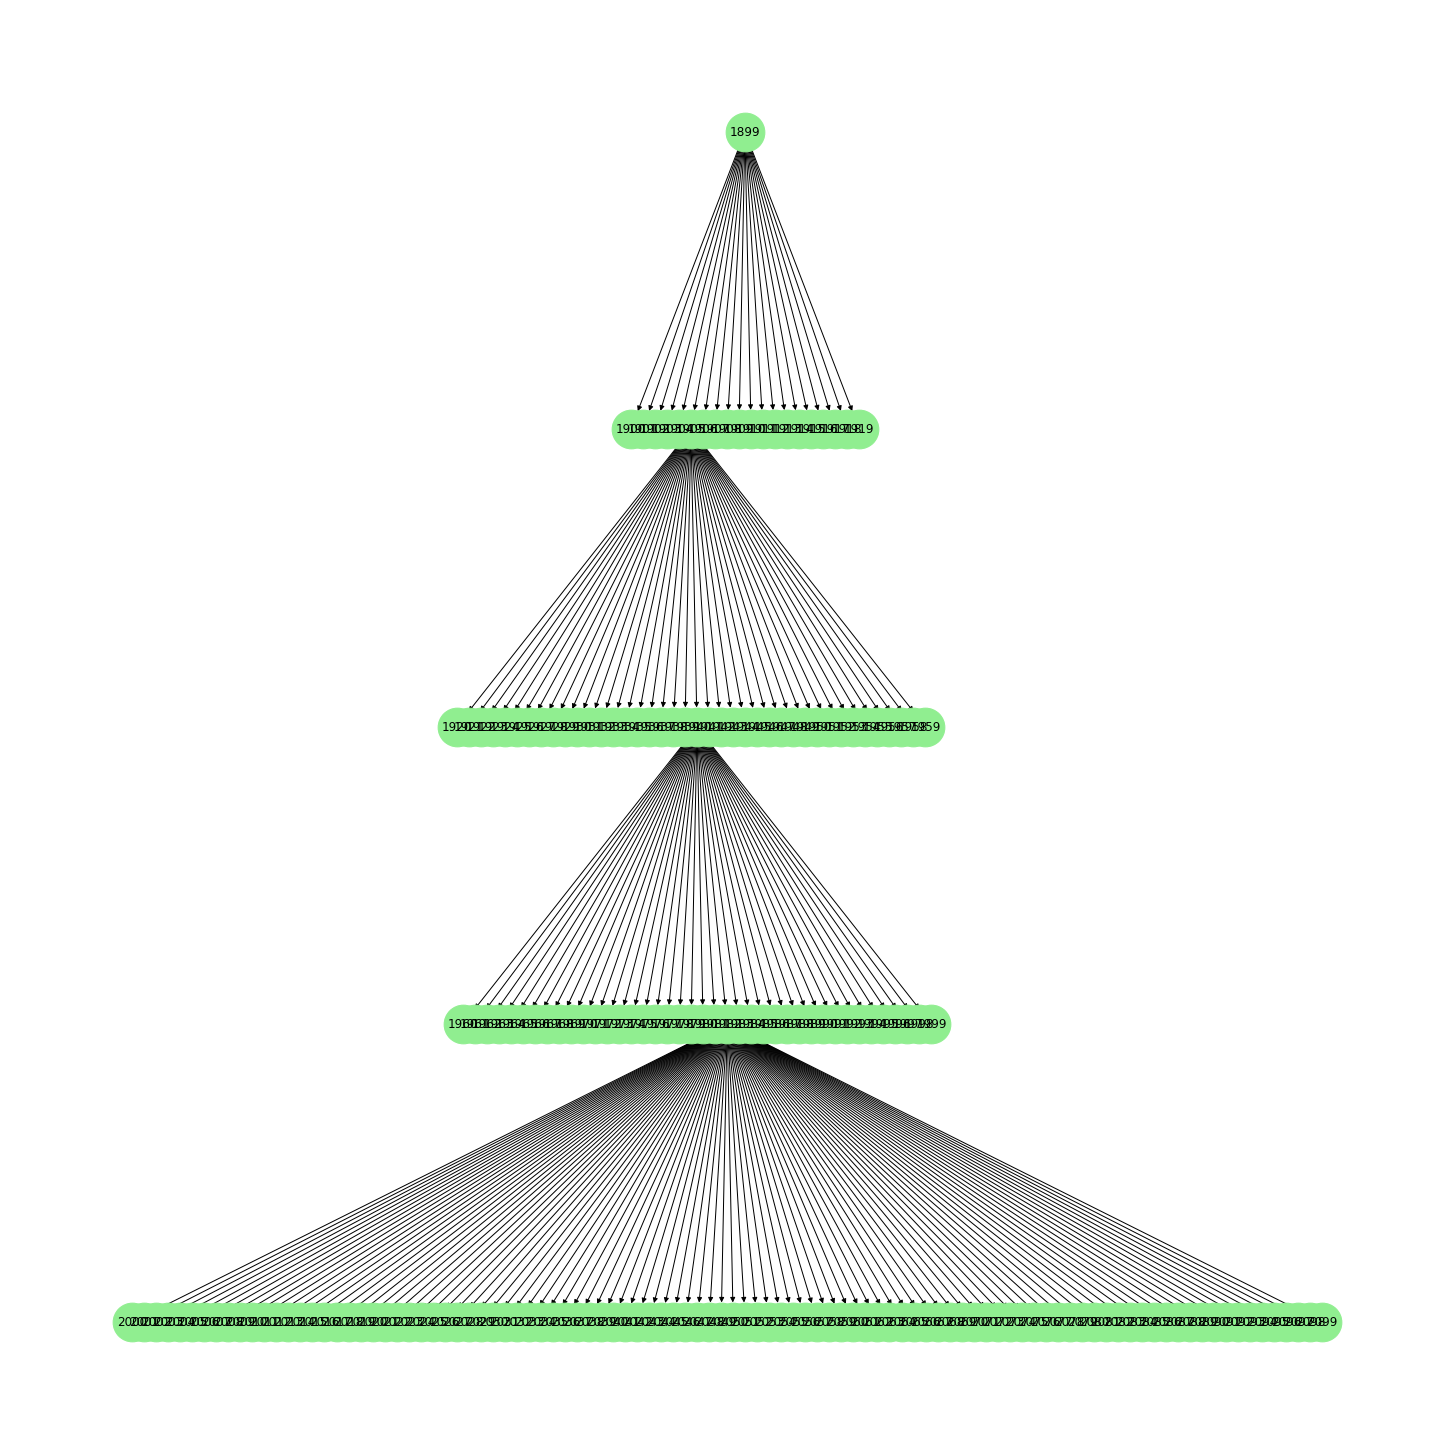

In [58]:
rcParams['figure.figsize'] = 20, 20
pos=graphviz_layout(G, prog='dot')
nx.draw(G, pos=pos,
        node_color='lightgreen', 
        node_size=1500,
        with_labels=True, 
        arrows=True)

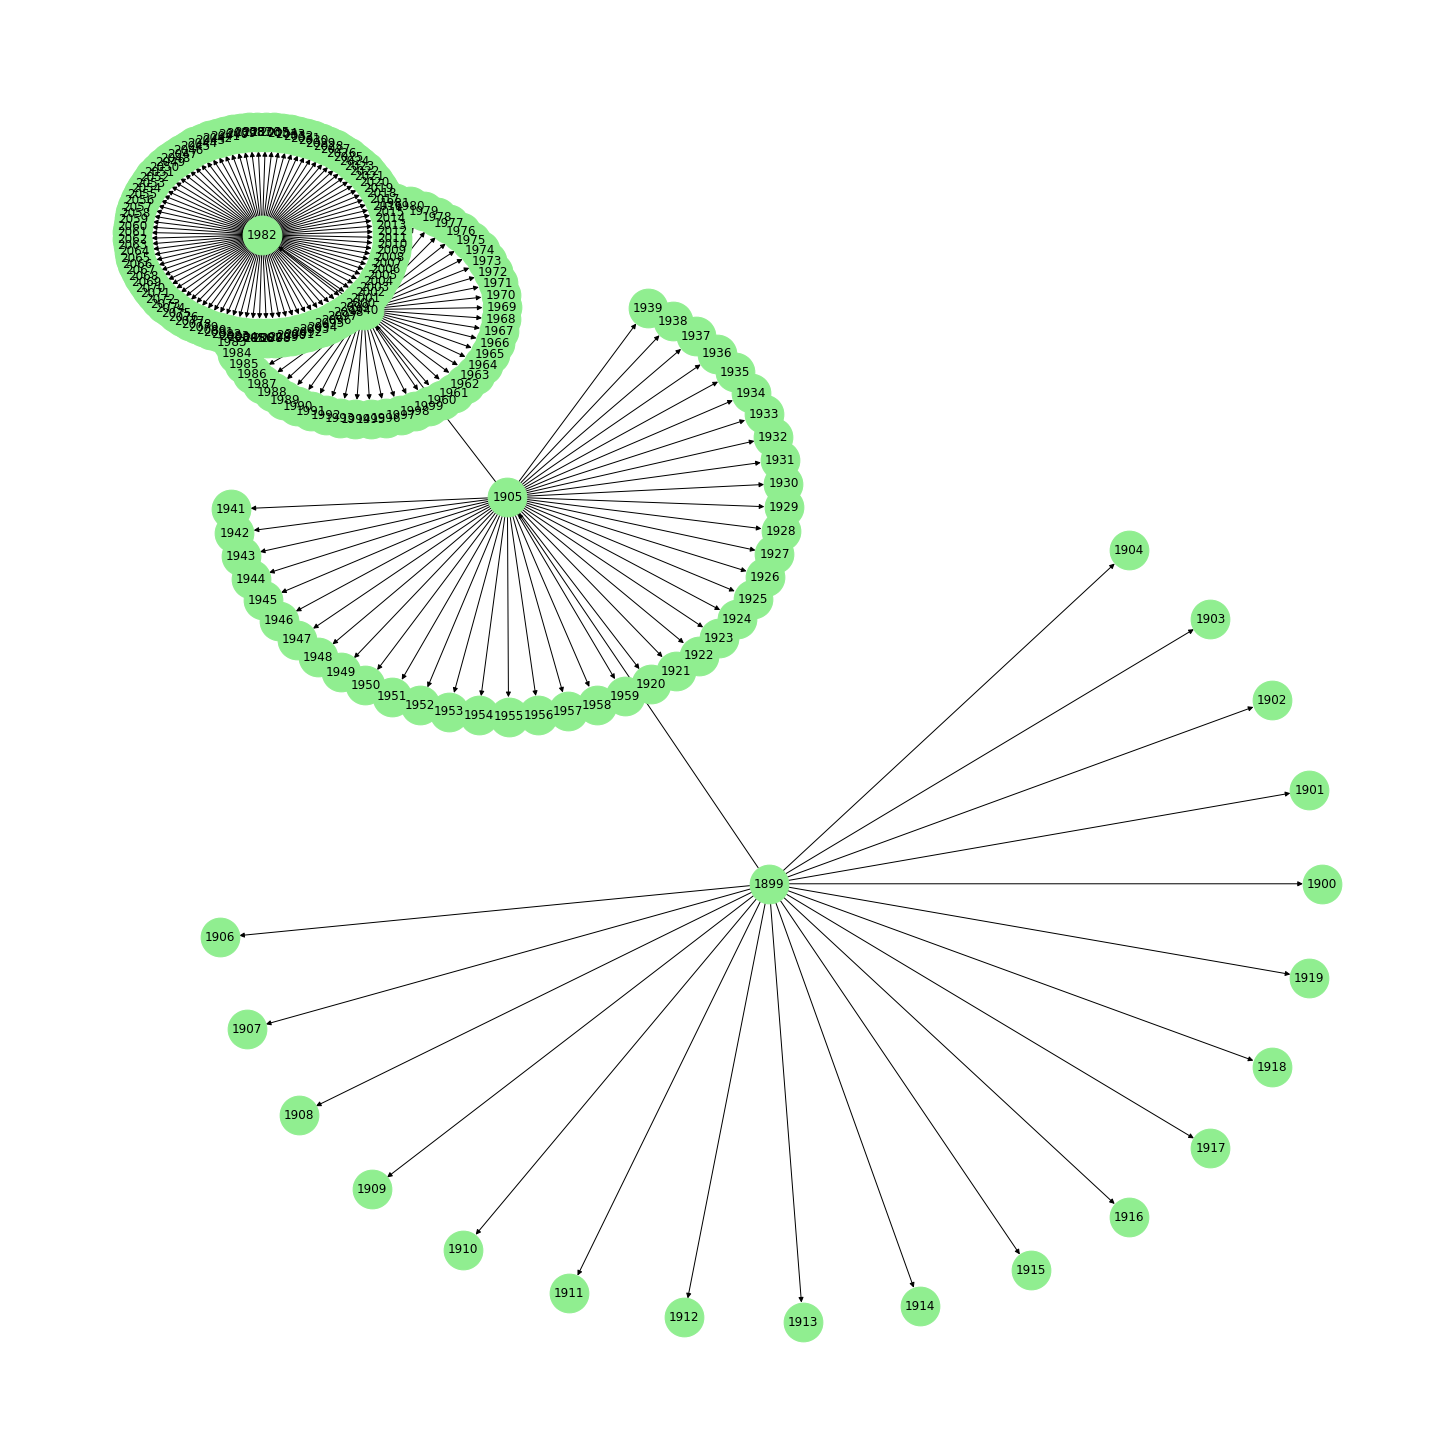

In [59]:
pos=graphviz_layout(G, prog='circo')
nx.draw(G, pos=pos,
        node_color='lightgreen', 
        node_size=1500,
        with_labels=True, 
        arrows=True)